# TensorFlow - Sistemas de Recomendação
## Eduardo Gomes Sanglard - IAA 2022
### Laboratório de Inteligência Artifical - Frameworks de IA

- Sistema de Recomendação - Filmes : Sistema de recomendação


Link para este notebook no Google Colab
https://drive.google.com/file/d/1cT6p4Kg3rNu9MtvKrcS8x1Hb-7g4VRBk/view?usp=sharing

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget -nc http://www.razer.net.br/datasets/ml-20m.zip
!unzip -n ml-20m.zip
df = pd.read_csv("ml-20m/ratings.csv")
df.head()

--2023-05-01 02:13:12--  http://www.razer.net.br/datasets/ml-20m.zip
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  85.6MB/s    in 2.2s    

2023-05-01 02:13:15 (85.6 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


- userId e movieId não estão no formato certo para usar
- Embeddings, devem ser categóricos

In [3]:
df.userId = pd.Categorical(df.userId)
df['new_user_id'] = df.userId.cat.codes
df.movieId = pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes

In [4]:
user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

In [5]:
N = len(set(user_ids))
M = len(set(movie_ids))
# dimensão do embedding (tentar outros)
K = 10

In [6]:
# usuário
u = Input(shape=(1,))
u_emb = Embedding(N, K)(u) # saída : num_samples, 1, K
u_emb = Flatten()(u_emb) # saída : num_samples, K
# filme
m = Input(shape=(1,))
m_emb = Embedding(M, K)(m) # saída : num_samples, 1, K
m_emb = Flatten()(m_emb) # saída : num_samples, K
x = Concatenate()([u_emb, m_emb])
x = Dense(1024, activation="relu")(x)
x = Dense(1)(x)
model = Model(inputs=[u, m], outputs=x)

In [7]:
model.compile(
loss="mse",
optimizer=SGD(learning_rate=0.08, momentum=0.9)
)

In [8]:
user_ids, movie_ids, ratings = shuffle(user_ids, movie_ids, ratings)
Ntrain = int(0.8 * len(ratings)) # separar os dados 80% x 20%
train_user = user_ids[:Ntrain]
train_movie = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]
test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]
# centralizar as notas
avg_rating = train_ratings.mean()
train_ratings = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating

In [9]:
epochs = 25
r = model.fit(
x=[train_user, train_movie],
y=train_ratings,
epochs=epochs,
batch_size=1024,
verbose=2, # não imprime o progresso
validation_data=([test_user, test_movie], test_ratings)
)

Epoch 1/25
15626/15626 - 80s - loss: 0.7656 - val_loss: 0.7173 - 80s/epoch - 5ms/step
Epoch 2/25
15626/15626 - 61s - loss: 0.6996 - val_loss: 0.6958 - 61s/epoch - 4ms/step
Epoch 3/25
15626/15626 - 62s - loss: 0.6772 - val_loss: 0.6798 - 62s/epoch - 4ms/step
Epoch 4/25
15626/15626 - 60s - loss: 0.6628 - val_loss: 0.6725 - 60s/epoch - 4ms/step
Epoch 5/25
15626/15626 - 61s - loss: 0.6513 - val_loss: 0.6658 - 61s/epoch - 4ms/step
Epoch 6/25
15626/15626 - 62s - loss: 0.6352 - val_loss: 0.6512 - 62s/epoch - 4ms/step
Epoch 7/25
15626/15626 - 62s - loss: 0.6188 - val_loss: 0.6444 - 62s/epoch - 4ms/step
Epoch 8/25
15626/15626 - 64s - loss: 0.6073 - val_loss: 0.6424 - 64s/epoch - 4ms/step
Epoch 9/25
15626/15626 - 63s - loss: 0.5983 - val_loss: 0.6367 - 63s/epoch - 4ms/step
Epoch 10/25
15626/15626 - 59s - loss: 0.5903 - val_loss: 0.6352 - 59s/epoch - 4ms/step
Epoch 11/25
15626/15626 - 63s - loss: 0.5826 - val_loss: 0.6313 - 63s/epoch - 4ms/step
Epoch 12/25
15626/15626 - 62s - loss: 0.5756 - val_l

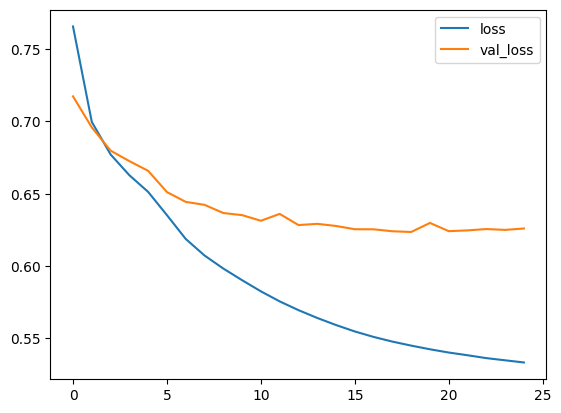

In [10]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

- Recomendações para o usuário 73023
- Gerar o array com o usuário único
- repete a quantidade de filmes

In [11]:
input_usuario = np.repeat(a=73023, repeats=M)
film = np.array(list(set(movie_ids)))
preds = model.predict( [input_usuario, film] )
# descentraliza as predições
rat = preds.flatten() + avg_rating
# índice da maior nota
idx = np.argmax(rat)
print("Recomendação: Filme - ", film[idx], " / ", rat[idx] , "*")

836/836 [==============================] - 2s 2ms/step
Recomendação: Filme -  293  /  4.1464057 *
